# 1. Introduction
## 1.1 Definition
In machine learning, the **train-test split** is a technique used to evaluate the performance of a model. It involves dividing the available dataset into two or more subsets:
* a training set and
* a test set (and sometimes a validation set).

#### The train-test split process typically follows these steps:
1. **Training Set:** The training set is used to *train the model.* The model learns the underlying patterns and relationships in the data during the training process.
2. **Test Set:** The test set is used to *evaluate the performance of the trained model.* The model is applied to the test set, and its performance metrics (such as **accuracy, precision, recall, F1-score,** etc.) are measured. This gives an estimate of how the model will perform on unseen data.

**Thanks to:**
* [Used Car Price Prediction Dataset](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset)

# 2. Import libraries

In [1]:
# import the necessary required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 3. Load the dataset

In [2]:
# load the raw dataset of used car from github
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_6_Training_and_Testing_Data/ML_6_used_cars.csv"
df = pd.read_csv(url)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### About Dataset
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

* Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
* Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
* Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
* Transmission: Determine the transmission type, whether automatic, manual, or another variant.
* Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
* Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

This dataset is a valuable resource for automotive enthusiasts, buyers, and researchers interested in analyzing trends, making informed purchasing decisions or conducting studies related to the automotive industry and consumer preferences. Whether you are a data analyst, car buyer, or researcher, this dataset offers a wealth of information to explore and analyze.

# 4. Exploratory Data Analysis (EDA)
## 4.1 Dataframe shape of matrix in columns, and rows.

In [3]:
df.shape

(4009, 12)

## 4.2 Dataframe full information
* number of instance for each feature,
* number of features
* datatypes of features
* value or content of features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
df.brand.unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [13]:
df.nunique()

,0
brand,57
model,1898
model_year,34
milage,2818
fuel_type,7
engine,1146
transmission,62
ext_col,319
int_col,156
accident,2


In [6]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
# check missing value
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [8]:
# check duplication
df.duplicated().sum()

0

In [9]:
# Check statistics of data set
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


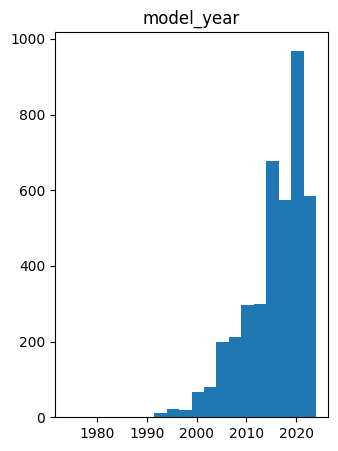

In [10]:
plt.figure(figsize=(12, 5))

for feature in df.columns:
    if df[feature].dtype in ['int64', 'float64']: # Check if the feature is numeric
        plt.subplot(1, 3, 1)
        plt.title(feature)
        plt.hist(df[feature], bins=20)
        plt.show() # Display each histogram separately

## Plot grap between age and sell price

In [11]:
%matplotlib inline
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color='brown', marker='+')
plt.xlabel('Age(yrs)', fontsize=14)
plt.ylabel('Sell Price($)', fontsize=14)

KeyError: 'Age(yrs)'

## Plot grap between mileage and sell price

In [ ]:
plt.scatter(df['Mileage'], df['Sell Price($)'], color='green', marker='*')
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Sell Price($)', fontsize=14)

## Splitting the datasets into 'training' and 'testing' set

In [ ]:
X = df[['Age(yrs)', 'Mileage']]
y = df['Sell Price($)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.info()

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

## Train the training datasets as per 'linear regression' model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
model.predict(X_test)

## Let's try with random_state argument

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.info()

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
model.score(X_test, y_test)